In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

df = pd.read_csv('Data (1).csv', sep=';')

# Inspect the first few rows
df.head()

,Unnamed: 0,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
0,31.05.2019,10018746.17,1443069.08,3332200.33,1328138.75,928085.74,736418.27,539403.31,427557.86,324459.32,...,116684.68,92699.67,63399.66,53265.12,37121.13,29787.10,24524.90,18085.94,16581.01,11442.97
1,30.06.2019,10868379.04,0.00,1392751.60,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,...,255222.42,198833.96,161996.73,138461.91,92346.68,79641.30,63457.44,52373.85,43374.70,37404.87
2,31.07.2019,10733932.61,0.00,0.00,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,...,302575.54,258652.52,191798.05,170027.54,127574.33,110301.21,89766.69,64746.84,61408.92,50312.70
3,31.08.2019,12558727.02,0.00,0.00,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,...,417223.56,336686.08,253556.20,200066.59,151859.74,109973.00,90228.14,70661.50,53102.83,47069.84
4,30.09.2019,14505071.44,0.00,0.00,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,...,628429.48,589692.85,457299.31,323764.87,288152.28,239872.99,192246.98,171550.69,142575.97,116853.05


In [2]:
repayment_columns = df.columns[2:]  # columns containing repayment data
historical_repayments = df.copy()

# Calculate repayment percentages
for col in repayment_columns:
    historical_repayments[col] = df[col] / df['Origination Amount']

# Display the historical repayment percentages
historical_repayments.head()

,Unnamed: 0,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
0,31.05.2019,10018746.17,0.144037,0.332597,0.132565,0.092635,0.073504,0.053839,0.042676,0.032385,...,0.011647,0.009253,0.006328,0.005317,0.003705,0.002973,0.002448,0.001805,0.001655,0.001142
1,30.06.2019,10868379.04,0.000000,0.128147,0.277124,0.113896,0.089335,0.082105,0.061533,0.046521,...,0.023483,0.018295,0.014905,0.012740,0.008497,0.007328,0.005839,0.004819,0.003991,0.003442
2,31.07.2019,10733932.61,0.000000,0.000000,0.143251,0.275140,0.112570,0.081925,0.066240,0.061324,...,0.028189,0.024097,0.017868,0.015840,0.011885,0.010276,0.008363,0.006032,0.005721,0.004687
3,31.08.2019,12558727.02,0.000000,0.000000,0.000000,0.128809,0.325034,0.110479,0.099343,0.070572,...,0.033222,0.026809,0.020190,0.015930,0.012092,0.008757,0.007184,0.005626,0.004228,0.003748
4,30.09.2019,14505071.44,0.000000,0.000000,0.000000,0.000000,0.137348,0.270970,0.096147,0.084654,...,0.043325,0.040654,0.031527,0.022321,0.019866,0.016537,0.013254,0.011827,0.009829,0.008056


In [3]:
import numpy as np

# Initialize the expected repayment percentages DataFrame
expected_repayments = pd.DataFrame(index=historical_repayments.index, columns=repayment_columns)

# Calculate p2 for each vintage
for index, row in historical_repayments.iterrows():
    if row['Unnamed: 0'] != '31.12.2020':
        p1 = row[repayment_columns[0]]
        p2 = row[repayment_columns[1]]
    else:
        p1 = row[repayment_columns[0]]
        p2 = 2 * p1
    
    # Set the first two repayment percentages
    expected_repayments.loc[index, repayment_columns[0]] = p1
    expected_repayments.loc[index, repayment_columns[1]] = p2
    
    # Calculate the remaining repayment percentages
    for i in range(2, len(repayment_columns)):
        pi = max(
            p2 * np.log(1 + (1 - (i - 1) / 30) * (1 - sum(expected_repayments.loc[index, repayment_columns[:i]]))),
            0
        )
        expected_repayments.loc[index, repayment_columns[i]] = pi

# Display the expected repayment percentages
expected_repayments.head()

,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,29.02.2020,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
0,0.144037,0.332597,0.136167,0.102607,0.075845,0.055307,0.040021,0.028887,0.020885,0.015173,0.011099,0.008186,0.006093,0.004578,0.003472,0.002659,0.002054,0.0016,0.001257,0.000993
1,0.0,0.128147,0.078334,0.071024,0.064192,0.057847,0.051992,0.046619,0.041714,0.037259,0.033227,0.029592,0.026323,0.023389,0.02076,0.018404,0.016294,0.014402,0.012703,0.011174
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Initialize forecasted cash flows list
forecasted_cash_flows_list = []

# Calculate forecasted cash flows for each vintage
for index, row in df.iterrows():
    origination_amount = row['Origination Amount']
    cash_flows = {col: origination_amount * expected_repayments.loc[index, col] for col in repayment_columns}
    cash_flows['vintage'] = row['Unnamed: 0']
    forecasted_cash_flows_list.append(cash_flows)

# Convert the list of dictionaries to a DataFrame
forecasted_cash_flows = pd.DataFrame(forecasted_cash_flows_list)

# Display the forecasted cash flows
forecasted_cash_flows.head()

,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,29.02.2020,...,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020,vintage
0,1443069.08,3332200.33,1.364218e+06,1.027996e+06,759869.273122,554109.814274,400958.399625,289410.170466,209245.753021,152009.455375,...,82012.955626,61040.926315,45862.887006,34788.333852,26635.808678,20577.980199,16032.963605,12589.061519,9952.940958,31.05.2019
1,0.00,1392751.60,8.513630e+05,7.719187e+05,697662.526693,628705.488971,565064.557298,506668.183879,453366.021751,404941.767891,...,321619.586771,286090.732935,254204.521388,225624.798938,200024.037759,177089.297163,156526.206995,138061.273378,121442.835247,30.06.2019
2,0.00,0.00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.07.2019
3,0.00,0.00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.08.2019
4,0.00,0.00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.09.2019


In [5]:
discount_rate = 0.025  # annual interest rate
monthly_discount_rate = (1 + discount_rate) ** (1/12) - 1  # convert to monthly rate

# Calculate the present value of each cash flow
forecasted_cash_flows_pv = forecasted_cash_flows.copy()
for i, col in enumerate(repayment_columns):
    forecasted_cash_flows_pv[col] = forecasted_cash_flows[col] / ((1 + monthly_discount_rate) ** (i + 1))

# Calculate the total present value of the portfolio
forecasted_cash_flows_pv['total_pv'] = forecasted_cash_flows_pv[repayment_columns].sum(axis=1)

# Calculate the portfolio value
portfolio_value = forecasted_cash_flows_pv['total_pv'].sum()
portfolio_value = round(portfolio_value, 2)

# Display the portfolio value
print("Portfolio Value:", portfolio_value)

Portfolio Value: 18260021.25


In [6]:
client_estimate = 84993122.67
absolute_difference = abs(portfolio_value - client_estimate)
relative_difference = absolute_difference / client_estimate

# Display the differences
print("Absolute Difference:", absolute_difference)
print("Relative Difference:", relative_difference)

# Determine if the difference is acceptable
threshold = 500000
is_acceptable = absolute_difference < threshold

print("Is the difference acceptable?", is_acceptable)

Absolute Difference: 66733101.42
Relative Difference: 0.7851588378403558
Is the difference acceptable? False


Portfolio Value: 18260021.25
Absolute Difference: 66733101.42
Relative Difference: 0.7851588378403558
Is the difference acceptable? False


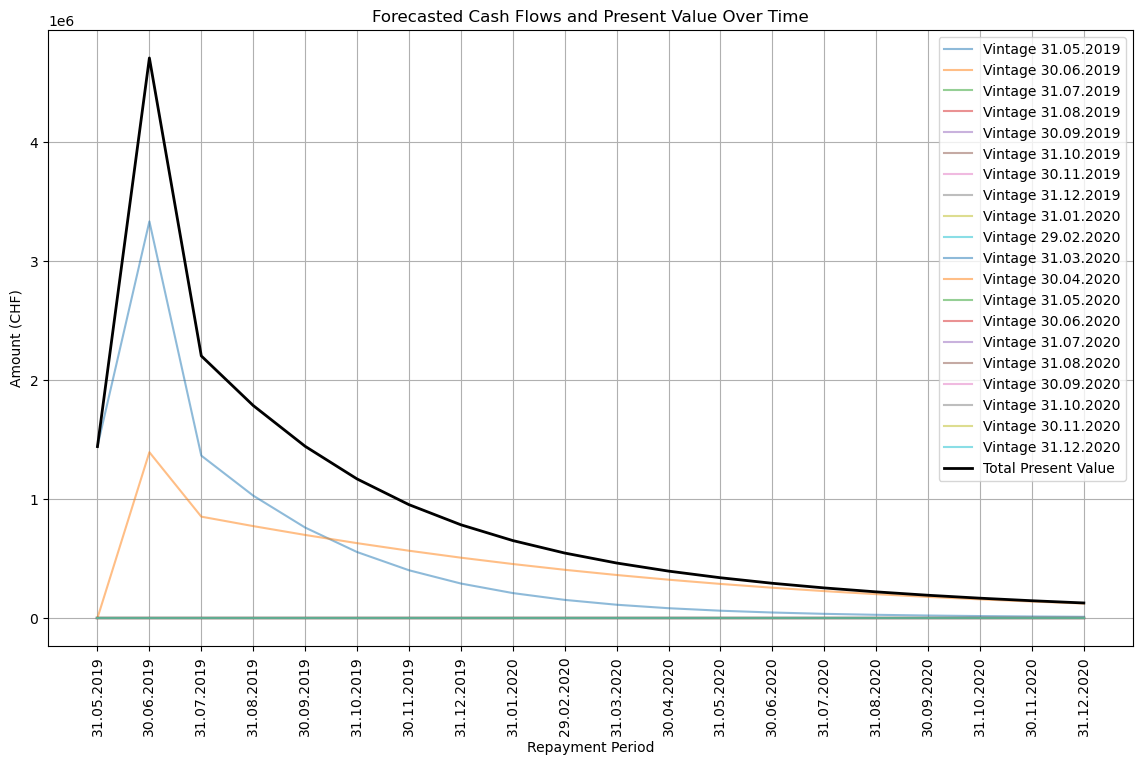

In [10]:
repayment_columns = df.columns[2:]  # columns containing repayment data
historical_repayments = df.copy()

# Calculate repayment percentages
for col in repayment_columns:
    historical_repayments[col] = df[col] / df['Origination Amount']

# Initialize the expected repayment percentages DataFrame
expected_repayments = pd.DataFrame(index=historical_repayments.index, columns=repayment_columns)

# Calculate p2 for each vintage
for index, row in historical_repayments.iterrows():
    if row['Unnamed: 0'] != '31.12.2020':
        p1 = row[repayment_columns[0]]
        p2 = row[repayment_columns[1]]
    else:
        p1 = row[repayment_columns[0]]
        p2 = 2 * p1

    # Set the first two repayment percentages
    expected_repayments.loc[index, repayment_columns[0]] = p1
    expected_repayments.loc[index, repayment_columns[1]] = p2

    # Calculate the remaining repayment percentages
    for i in range(2, len(repayment_columns)):
        pi = max(
            p2 * np.log(1 + (1 - (i - 1) / 30) * (1 - sum(expected_repayments.loc[index, repayment_columns[:i]]))),
            0
        )
        expected_repayments.loc[index, repayment_columns[i]] = pi

# Initialize forecasted cash flows list
forecasted_cash_flows_list = []

# Calculate forecasted cash flows for each vintage
for index, row in df.iterrows():
    origination_amount = row['Origination Amount']
    cash_flows = {col: origination_amount * expected_repayments.loc[index, col] for col in repayment_columns}
    cash_flows['vintage'] = row['Unnamed: 0']
    forecasted_cash_flows_list.append(cash_flows)

# Convert the list of dictionaries to a DataFrame
forecasted_cash_flows = pd.DataFrame(forecasted_cash_flows_list)

# Calculate the present value of the forecasted cash flows
discount_rate = 0.025  # annual interest rate
monthly_discount_rate = (1 + discount_rate) ** (1/12) - 1  # convert to monthly rate

# Calculate the present value of each cash flow
forecasted_cash_flows_pv = forecasted_cash_flows.copy()
for i, col in enumerate(repayment_columns):
    forecasted_cash_flows_pv[col] = forecasted_cash_flows[col] / ((1 + monthly_discount_rate) ** (i + 1))

# Calculate the total present value of the portfolio
forecasted_cash_flows_pv['total_pv'] = forecasted_cash_flows_pv[repayment_columns].sum(axis=1)

# Calculate the portfolio value
portfolio_value = forecasted_cash_flows_pv['total_pv'].sum()
portfolio_value = round(portfolio_value, 2)  # Ensure the value is rounded to two decimal places

# Display the portfolio value
print("Portfolio Value:", portfolio_value)

# Compare with client's estimate
client_estimate = 84993122.67
absolute_difference = abs(portfolio_value - client_estimate)
relative_difference = absolute_difference / client_estimate

# Display the differences
print("Absolute Difference:", absolute_difference)
print("Relative Difference:", relative_difference)

# Determine if the difference is acceptable
threshold = 500000
is_acceptable = absolute_difference < threshold

print("Is the difference acceptable?", is_acceptable)

# Plotting the forecasted cash flows and present value over time
plt.figure(figsize=(14, 8))

# Plot forecasted cash flows
for index, row in forecasted_cash_flows.iterrows():
    plt.plot(repayment_columns, row[repayment_columns], label=f'Vintage {row["vintage"]}', alpha=0.5)

# Plot total present value over time
total_pv_over_time = forecasted_cash_flows_pv[repayment_columns].sum(axis=0)
plt.plot(repayment_columns, total_pv_over_time, label='Total Present Value', color='black', linewidth=2)

plt.xlabel('Repayment Period')
plt.ylabel('Amount (CHF)')
plt.title('Forecasted Cash Flows and Present Value Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

## Penjelasan 